# **Houston Crime and Weather Relationship**<B>
* Timeseries Analysis for Houston Police Department Crime Data


## **Import Modules**

In [132]:
#### Import the libraries needed
import pandas as pd
import numpy as np
from datetime import datetime, timedelta 
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.filterwarnings('ignore')
%matplotlib inline

## **Set Environment**

In [2]:
# Set pd.options to add slide bars
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
# Set default title color
plt.style.use('fivethirtyeight')
plt.rcParams.update({'text.color': "#333333", 
                     'axes.labelcolor': "#333333", 'axes.labelweight': 'bold'})

In [4]:
# Set default title color
plt.style.use('fivethirtyeight')
# Set default title color
plt.rcParams.update({'text.color': "#333333", 'axes.labelcolor': "#333333"})

# set default plt figure size
plt.rcParams["figure.figsize"] = [10, 5]
# figure suptitle
plt.rcParams["figure.titlesize"] = 26
plt.rcParams["figure.titleweight"] = "bold"
# set default plt font size
# plt.rcParams["font.size"] = 24
# font weight
# plt.rcParams["font.weight"] = "bold"
# title location
plt.rcParams["axes.titlelocation"] = "left"
# title size
plt.rcParams["axes.titlesize"] = 18
# title wight
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["axes.labelweight"] = "normal"
# spines
plt.rcParams["axes.spines.bottom"] = True
plt.rcParams["axes.spines.left"] = True
# axis labels
# plt.rcParams["xaxis.labellocation"] = "left"
# plt.rcParams["yaxis.labellocation"] = "top"
plt.rcParams["axes.labelweight"] = "bold"

plt.rcParams["font.weight"] = "bold"

## **Load data**
* The dataset contains 2,307,150 rows and 17 columns

In [5]:
# Load a dataset as df_wiki
df_crime =  pd.read_csv('data/merged_jan2010_Jul2023.csv', parse_dates=['Occurrence Date'], dtype={'Occurrence Date': float, 'Beat': str, 'ZIP Code': str, 'Offense Count': float, 'Incident': float})
df_crime.head()

,Occurrence Date,Occurrence Hour,NIBRS Description,Offense Count,Beat,Premise,Block Range,Street Name,Street Type,Suffix,Incident,NIBRS Class,City,ZIP Code,Street No,MapLongitude,MapLatitude
0,2010-01-01,8.0,Theft,1.0,3B10,20R,4900-4999,POINCIANA,DR,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-01,18.0,Theft,1.0,5F20,20D,8700-8799,HAMMERLY,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-01,0.0,Burglary,1.0,1A10,05O,400-499,MAIN,ST,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-01,0.0,Theft,1.0,7C10,20R,1900-1999,LOCKWOOD,DR,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-01,10.0,Theft,1.0,18F20,18A,3300-3399,MCCUE,RD,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Descriptive Statistics**

In [6]:
num_row = df_crime.shape[0]
num_column = df_crime.shape[1]
print(f"Number of Rows: {num_row:,}")
print(f"Number of Columns: {num_column:,}")

Number of Rows: 2,307,150
Number of Columns: 17


In [7]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2307150 entries, 0 to 2307149
Data columns (total 17 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Occurrence Date    datetime64[ns]
 1   Occurrence Hour    object        
 2   NIBRS Description  object        
 3   Offense Count      float64       
 4   Beat               object        
 5   Premise            object        
 6   Block Range        object        
 7   Street Name        object        
 8   Street Type        object        
 9   Suffix             object        
 10  Incident           float64       
 11  NIBRS Class        object        
 12  City               object        
 13  ZIP Code           object        
 14  Street No          object        
 15  MapLongitude       float64       
 16  MapLatitude        float64       
dtypes: datetime64[ns](1), float64(4), object(12)
memory usage: 299.2+ MB


In [8]:
df_crime.describe()

,Offense Count,Incident,MapLongitude,MapLatitude
count,2.296840e+06,1.111335e+06,392147.000000,392147.000000
mean,1.026311e+00,8.318521e+07,-95.416751,29.755169
std,2.115527e-01,5.002611e+07,0.111731,0.093016
min,0.000000e+00,5.200000e+02,-95.997926,29.385800
25%,1.000000e+00,4.085922e+07,-95.504777,29.688916
50%,1.000000e+00,8.117652e+07,-95.411035,29.740215
75%,1.000000e+00,1.241803e+08,-95.342364,29.812019
max,6.500000e+01,9.962491e+08,-94.870391,30.219917


In [9]:
df_crime.describe(include='object')

,Occurrence Hour,NIBRS Description,Beat,Premise,Block Range,Street Name,Street Type,Suffix,NIBRS Class,City,ZIP Code,Street No
count,2307150.0,2307150,2306200,2273617,1660244,2307149,2209899,1234093,1111335,1111335,1097813,642415
unique,100.0,77,368,428,14578,35934,56,5,62,308,479,15154
top,12.0,Theft,12D10,"Residence, Home (Includes Apartment)",900-999,WESTHEIMER,ST,-,23F,HOUSTON,77036,2800
freq,119378.0,573377,47541,460679,16556,63948,509835,908229,127621,1106033,37286,2273


## **Duplicate Handling**
* The dataset contains 3531 duplicates
* After removing the duplicates, 2,303,619 rows remain

In [10]:
# Check duplicates
df_crime.duplicated().sum()

3531

In [11]:
# Check duplicate rows
df_crime[df_crime.duplicated(keep=False)].head(10)

,Occurrence Date,Occurrence Hour,NIBRS Description,Offense Count,Beat,Premise,Block Range,Street Name,Street Type,Suffix,Incident,NIBRS Class,City,ZIP Code,Street No,MapLongitude,MapLatitude
474,2010-01-02,0.0,Burglary,1.0,6B10,20R,11300-11399,BANNISTER,LN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,2010-01-02,17.0,Theft,1.0,5F40,080,7900-7999,FM 1960,-,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN
522,2010-01-02,0.0,Burglary,1.0,6B10,20R,11300-11399,BANNISTER,LN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536,2010-01-02,17.0,Theft,1.0,5F40,080,7900-7999,FM 1960,-,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN
560,2010-01-02,13.0,Theft,1.0,15E10,080,700-799,MEYERLAND PLAZA,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
581,2010-01-02,13.0,Theft,1.0,15E10,080,700-799,MEYERLAND PLAZA,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
800,2010-01-03,21.0,Theft,1.0,3B30,20D,1700-1799,LAMONTE,LN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
803,2010-01-03,21.0,Theft,1.0,3B30,20D,1700-1799,LAMONTE,LN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1200,2010-01-04,14.0,Theft,1.0,18F20,24C,5000-5099,WESTHEIMER,RD,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1225,2010-01-04,4.0,Burglary,1.0,18F50,210,6600-6699,SOUTHWEST,FWY,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### -- Restore Point --

In [18]:
# Drop duplicates
df_crime_drop_dup = df_crime.drop_duplicates()

In [19]:
# Check shape
df_crime_drop_dup.shape

(2303619, 17)

## **Missing Value Analysis**
* 10310 rows are missing an "Offense Count" value
* Remove rows where "Offense Count" is null
* For timeseries analysis, only use the 'Occurrence Date', 'Occurrence Hour', and 'Offense Count' columns
* 2,293,309 rows and 3 columns remain

In [20]:
# Check the number of null values
df_crime_drop_dup.isnull().sum()

Occurrence Date            0
Occurrence Hour            0
NIBRS Description          0
Offense Count          10310
Beat                     950
Premise                33530
Block Range           646906
Street Name                1
Street Type            97251
Suffix               1073057
Incident             1192284
NIBRS Class          1192284
City                 1192284
ZIP Code             1205806
Street No            1661204
MapLongitude         1911472
MapLatitude          1911472
dtype: int64

In [21]:
# Check rows whose 'Offense Count' is null 
df_crime_drop_dup[df_crime_drop_dup['Offense Count'].isnull()].head()

,Occurrence Date,Occurrence Hour,NIBRS Description,Offense Count,Beat,Premise,Block Range,Street Name,Street Type,Suffix,Incident,NIBRS Class,City,ZIP Code,Street No,MapLongitude,MapLatitude
11556,2010-02-01,15.0,Theft,NaN,1A10,NaN,10200-10299,BUFFALO SPEEDWAY,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253096,2011-12-02,14.0,Theft,NaN,20G20,NaN,1900-1999,WILCREST,DR,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265540,2012-01-07,19,Burglary,NaN,18F40,NaN,3000-3099,DUNVALE,RD,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
321812,2012-06-22,12,Theft,NaN,1A10,NaN,1300-1399,POST OAK,BLVD,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329367,2012-07-12,7,Theft,NaN,19G30,NaN,13100-13199,ALIEF CLODINE,RD,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### -- Restore Point --

In [22]:
# Drop rows whose "Offense Count" is null
df_crime_final = df_crime_drop_dup.dropna(subset='Offense Count')

In [23]:
# Check the null values
df_crime_final.isna().sum()

Occurrence Date            0
Occurrence Hour            0
NIBRS Description          0
Offense Count              0
Beat                     940
Premise                23220
Block Range           646815
Street Name                1
Street Type            97251
Suffix               1073057
Incident             1181974
NIBRS Class          1181974
City                 1181974
ZIP Code             1195496
Street No            1650894
MapLongitude         1901162
MapLatitude          1901162
dtype: int64

In [24]:
# Keep 'Occurrence Date', 'Occurrence Hour', and 'Offense Count'
df_crime_final = df_crime_final[['Occurrence Date', 'Occurrence Hour', 'Offense Count']]

In [25]:
df_crime_final.head()

,Occurrence Date,Occurrence Hour,Offense Count
0,2010-01-01,8.0,1.0
1,2010-01-01,18.0,1.0
2,2010-01-01,0.0,1.0
3,2010-01-01,0.0,1.0
4,2010-01-01,10.0,1.0


In [26]:
df_crime_final.shape

(2293309, 3)

In [32]:
df_crime_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2293309 entries, 2010-01-01 to 2023-07-29
Data columns (total 3 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Occurrence Hour         object 
 1   Offense Count           float64
 2   cleaned_occurence_hour  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 70.0+ MB


## **Feature Conversion**
* 'Occurence Hour' includes float, int and string values
* Extract only numerical values from 'Occurence Hour'
* Convert 'Occurence Hour' to the int data type
* Create a new column "cleaned_occurence_hour" to save cleaned Occurence Hour

In [27]:
# Clean 'Occurence Hour' to extract only numbers
df_crime_final['cleaned_occurence_hour'] = [int(re.search(r'\d', s).group()) if type(s) == str else int(s) for s in df_crime_final['Occurrence Hour']]

In [28]:
# Check unique values
df_crime_final['cleaned_occurence_hour'].unique()

array([ 8, 18,  0, 10, 22, 23, 20, 19, 21,  6,  7, 17, 16,  1, 12,  2,  3,
        5, 11,  9,  4, 15, 14, 13, 24], dtype=int64)

In [29]:
# Replace 0 with 24
df_crime_final['cleaned_occurence_hour'].replace({0: 24}, inplace=True)

In [30]:
df_crime_final.head()

,Occurrence Date,Occurrence Hour,Offense Count,cleaned_occurence_hour
0,2010-01-01,8.0,1.0,8
1,2010-01-01,18.0,1.0,18
2,2010-01-01,0.0,1.0,24
3,2010-01-01,0.0,1.0,24
4,2010-01-01,10.0,1.0,10


## **Exploratory Data Analysis**
* The daily total of 'Offense Count' increased after 
* Set 'Occurence Date" as an index


* The daily total of 'Offense Count' increased after 
* Set 'Occurence Date" as an index

In [31]:
# Set 'Occurrence Date' as index
df_crime_final.set_index('Occurrence Date', inplace=True)

In [33]:
# Convert 'Offense Count' from float to int
df_crime_final['Offense Count'] = df_crime_final['Offense Count'].astype(int)

In [34]:
# Average crime count from 2010-01-01 through 2023-07-31
average_crime = df_crime_final['Offense Count'].sum() / len(df_crime_final)
min_crime = df_crime_final['Offense Count'].min()
max_crime = df_crime_final['Offense Count'].max()
print(f"Overall average crime count: {average_crime:.2f}")
print(f"Minimum daily crime count: {min_crime:.2f}")
print(f"Maximum daily crime count: {max_crime:.2f}")

Overall average crime count: 1.03
Minimum daily crime count: 0.00
Maximum daily crime count: 65.00


In [50]:
# Get total and average 'Offense Count' by 'Occurrence Date'
count_by_day = df_crime_final.groupby(df_crime_final.index)[['Offense Count']].sum()
count_by_day.sort_values('Offense Count', ascending=False).head()

,Offense Count
Occurrence Date,
2022-04-01,925
2022-01-01,919
2022-05-01,900
2022-08-01,886
2021-01-01,884


#### **Daily Total Offense Count**
* Daily total of 'Offense Count' increased to 490.0 on 2018-06-01
* After 2018 June 1, the total 'Offense Count' increased
* Houston Police Department changed the reporting format on 2018 Jun 1. They might have changed/upgraded their reporting system itself 

In [125]:
)# Check the difference of daily total 'Offense Count'
count_by_day_diff = count_by_day.diff()
max_diff = count_by_day_diff['Offense Count'].max()
max_diff_day = count_by_day_diff[count_by_day_diff['Offense Count'] == max_diff].index.date[0]
print(f"Daily total of 'Offense Count' increased {max_diff} on {max_diff_day}"

Daily total of 'Offense Count' increased 490.0 on 2018-06-01


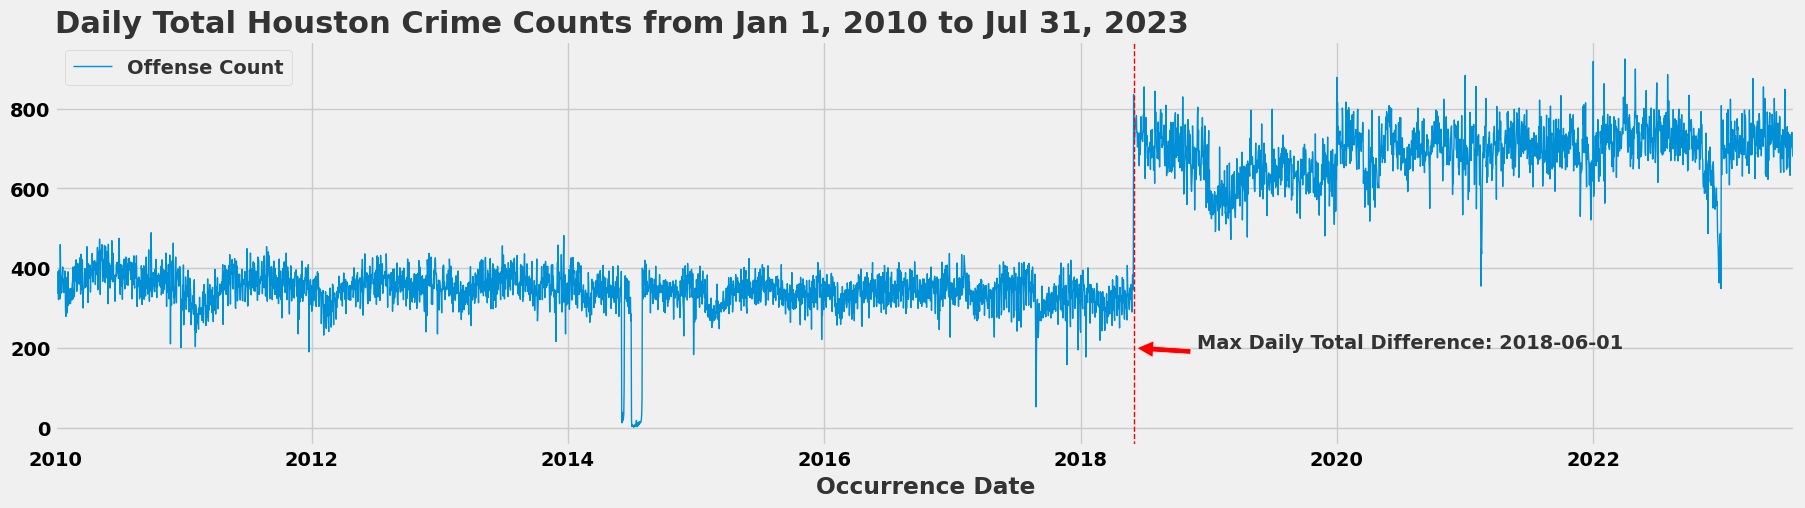

In [134]:
# Plot daily traffic
fig, ax = plt.subplots(figsize=(20, 5))

plt.title("Daily Total Houston Crime Counts from Jan 1, 2010 to Jul 31, 2023", fontsize=22, fontweight='bold')
count_by_day.plot(ax=ax, lw=1)
ax.axvline(max_diff_day, lw=1, ls='--', color='red')

# Annotate maximum daily total diference
ax.annotate(f"Max Daily Total Difference: {max_diff_day}", 
            xy=(max_diff_day, 200), 
            xytext=(max_diff_day + timedelta(days=180), 200),
            arrowprops=dict(facecolor='red', shrink=0.05));

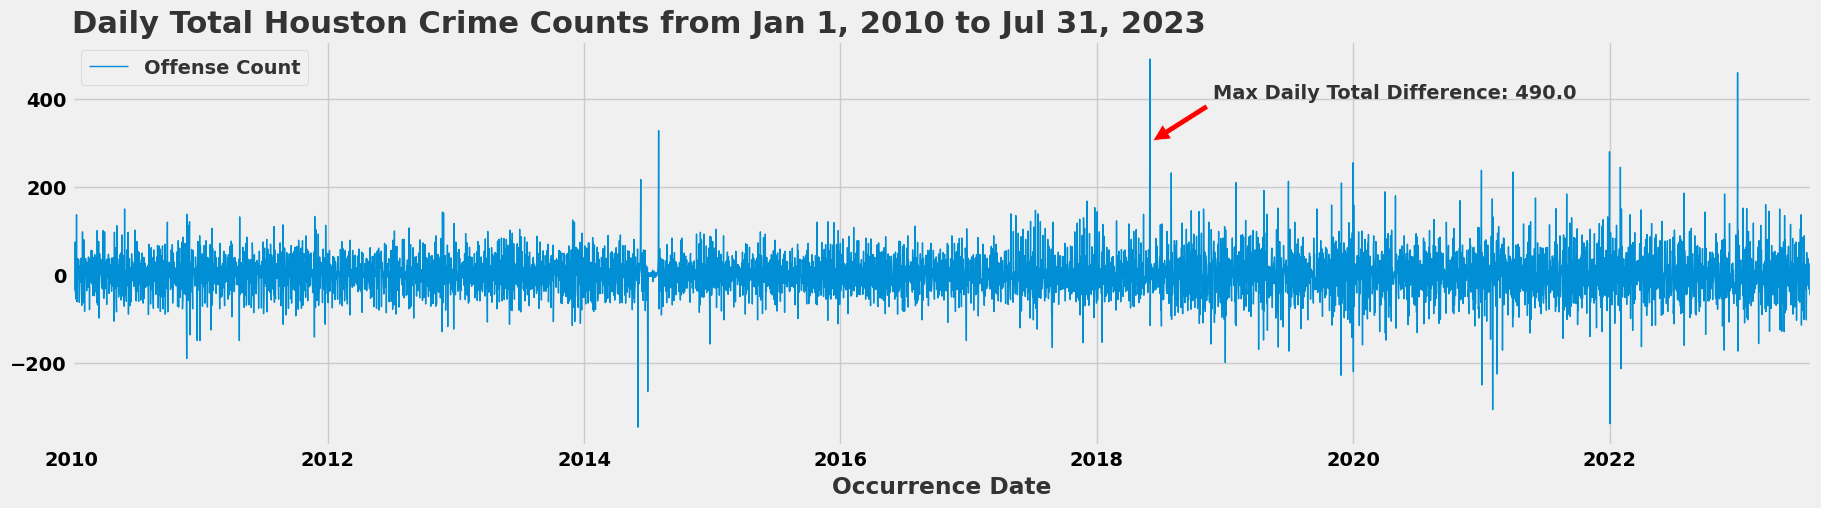

In [146]:
# Plot the difference of daily total 'Offense Count'
fig, ax = plt.subplots(figsize=(20, 5))

plt.title("Daily Total Houston Crime Counts from Jan 1, 2010 to Jul 31, 2023", fontsize=22, fontweight='bold')
count_by_day_diff.plot(ax=ax, lw=1)

# Annotate maximum daily total diference
ax.annotate(f"Max Daily Total Difference: {max_diff}", 
            xy=(max_diff_day, 300), 
            xytext=(max_diff_day + timedelta(days=180), 400),
            arrowprops=dict(facecolor='red', shrink=0.05));

##### Create 'week', 'month', 'year', 'mon_year', and 'season' features

In [135]:
# Weekly average 'Offense Count'
df_crime_final['week'] = df_crime_final.index.map(lambda m: m.day_name())

# Monthly average 'Offense Count'
df_crime_final['month'] = df_crime_final.index.map(lambda m: m.month)

# Yearly average 'Offense Count'
df_crime_final['year']= df_crime_final.index.map(lambda m: m.year)

# Monthly average 'Offense Count'
df_crime_final['mon_year'] = df_crime_final.index.map(lambda m: m.strftime('%b-%Y'))

# Average 'Offense Count' by season 
df_crime_final['season'] = df_crime_final.index.map(lambda m: (m.month % 12) // 3 + 1)
df_crime_final['season'] = df_crime_final['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'})

##### Total 'Offense Count' by Create 'week', 'month', 'year', 'mon_year', and 'season' features

In [136]:
# Weekly 'Offense Count'
count_by_week = df_crime_final.groupby('week')[['Offense Count']].sum()

# Monthly 'Offense Count'
count_by_mon_year = df_crime_final.groupby('mon_year')[['Offense Count']].sum()

# 'Offense Count' by year
count_by_year = df_crime_final.groupby('year')[['Offense Count']].sum()

# 'Offense Count' by month
count_by_month = df_crime_final.groupby('month')[['Offense Count']].sum()

# 'Offense Count' by season
count_by_season = df_crime_final.groupby('season')[['Offense Count']].sum()

# 'Offense Count' by hour
count_by_hour = df_crime_final.groupby('cleaned_occurence_hour')[['Offense Count']].sum()

In [137]:
# Create a label for a plot by month by year
mon_year_label = df_crime_final['mon_year'].unique()

In [138]:
# Create a list for 'Offense Count' by 'mon_year' order
mon_year_count = [count_by_mon_year.loc[m_y, 'Offense Count'] for m_y in mon_year_label]

In [160]:
# Get an index of min_mon_year_count
for i in range(len(mon_year_count)):
    if mon_year_count[i] == min(mon_year_count):
        min_index = i
        break

# Get an index of min_mon_year_count
for i in range(len(mon_year_count)):
    if mon_year_count[i] == max(mon_year_count):
        max_index = i
        break

In [163]:
# Print
print(f"Min Count Offense Date: {mon_year_label[min_index]}, Count: {min(mon_year_count)}")
print(f"Max Count Offense Date: {mon_year_label[max_index]}, Count: {max(mon_year_count)}")

Min Count Offense Date: Jul-2014, Count: 358
Max Count Offense Date: May-2022, Count: 23005


#### **Monthly Total 'Offense Count'**
* The total 'Offense Count' in July 2014 recorded the minimum of 358
* The total 'Offense Count' in May 2022 recorded the minimum of 23005

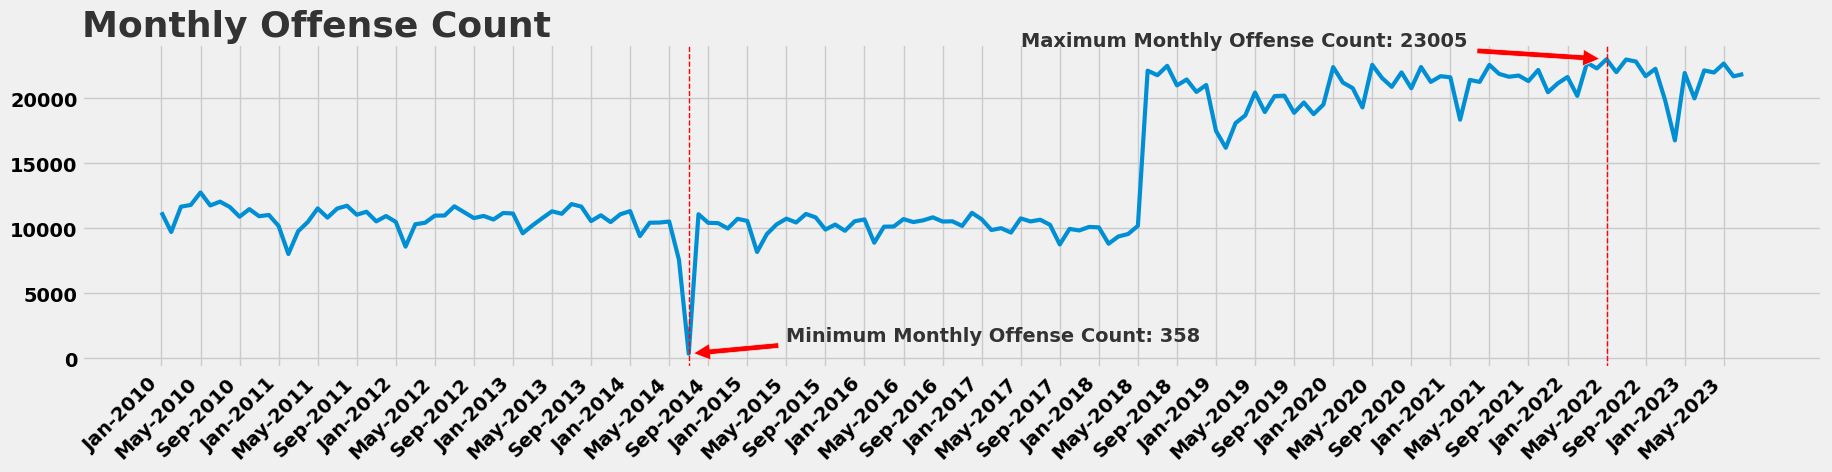

In [165]:
# Plot the sum of 'Offense Count' by 'mon_year'
fig, ax = plt.subplots(figsize=(20, 4))
plt.title("Monthly Offense Count", fontsize=26, weight='bold')
bar1 = sns.lineplot(x=mon_year_label, y=mon_year_count, ax=ax, lw=3)
bar1.set_xticklabels(bar1.get_xticklabels(), rotation=45, ha='right')

# Get current locations and labels
locs, labels = plt.xticks()

# Select labels to keep
keep_labels = [labels[i] for i in range(len(labels)) if i%4 == 0]

# Set new locations and labels
plt.xticks(locs[::4], keep_labels)

# Draw virtical lines
ax.axvline(min_index, ls='--', lw=1, color='r')
ax.axvline(max_index, ls='--', lw=1, color='r')

# Annotate minimum offense count
ax.annotate(f"Minimum Monthly Offense Count: {min_mon_year_count}", 
            xy=(min_index, min_mon_year_count), 
            xytext=(min_index+10, min_mon_year_count+1000),
            arrowprops=dict(facecolor='red', shrink=0.05))

# Annotate maximum offense count
ax.annotate(f"Maximum Monthly Offense Count: {max_mon_year_count}", 
            xy=(max_index, max_mon_year_count), 
            xytext=(max_index-60, max_mon_year_count+1000),
            arrowprops=dict(facecolor='red', shrink=0.05));

#### **Yearly Total 'Offense Count'**

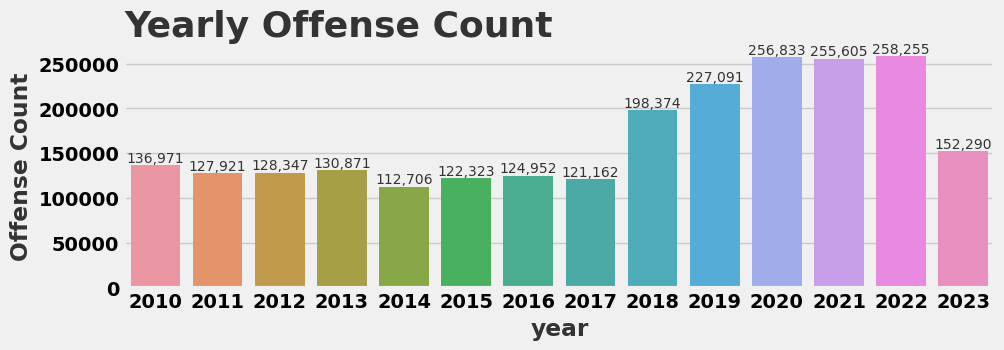

In [166]:
# Plot the sum of 'Offense Count' by 'year'
fig, ax = plt.subplots(figsize=(10, 3))
plt.title("Yearly Offense Count", fontsize=26, weight='bold')
bar1 = sns.barplot(x=count_by_year.index, y=count_by_year['Offense Count'], ax=ax)

# Display the yearly 'Offense Count'
count_by_data = count_by_year
for i in range(len(count_by_data)):
    idx = count_by_data.index[i]
    val = count_by_data.loc[idx, 'Offense Count']
    plt.text(s=f"{val:,}", x=i, y=val, ha='center', va='bottom', fontsize=10, weight='normal');

#### **Monthly Breakdown of 'Offense Count' Total**
* Considering that February has only 28 days and that the data set covers January 2010 through July 2023, there appears to be no difference in the breakdown of the monthly totals.

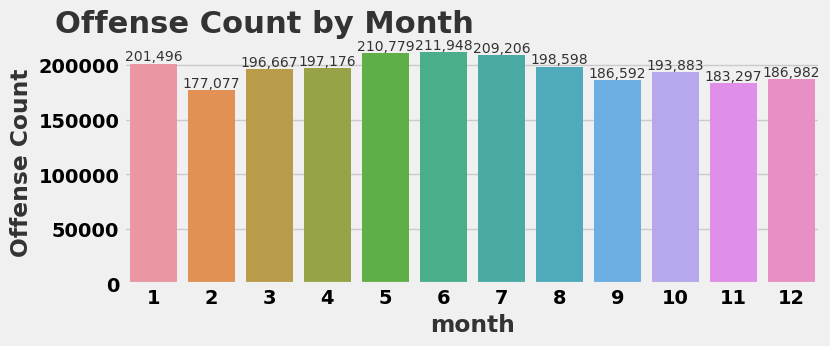

In [167]:
# Plot the sum of 'Offense Count' by 'month'
fig, ax = plt.subplots(figsize=(8, 3))
plt.title("Offense Count by Month", x=-0.1, fontsize=22, weight='bold')
bar1 = sns.barplot(x=count_by_month.index, y=count_by_month['Offense Count'], data=count_by_month, ax=ax)

# Display the yearly 'Offense Count'
count_by_data = count_by_month
for i in range(len(count_by_data)):
    idx = count_by_data.index[i]
    val = count_by_data.loc[idx, 'Offense Count']
    plt.text(s=f"{val:,}", x=i, y=val, ha='center', va='bottom', fontsize=10, weight='normal');

#### **Weekly Breakdown of 'Offense Count' Total**
* Friday has the maximum total 'Offense Count', while Sunday has the minimum total

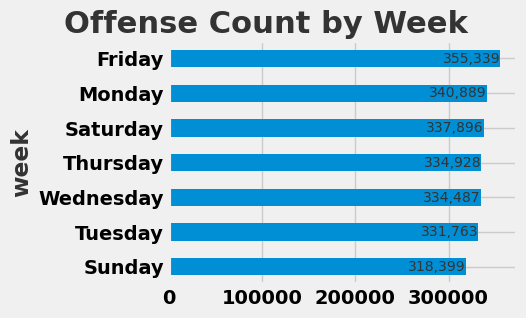

In [169]:
# Plot the sum of 'Offense Count' aggregated by week
fig, ax = plt.subplots(figsize=(4, 3))
plt.title("Offense Count by Week", x=-0.3, fontsize=22, weight='bold')
bar1 = count_by_week.sort_values('Offense Count').plot(kind='barh', ax=ax)
plt.gca().legend_ = None

# Display the weekly 'Offense Count'
count_by_data = count_by_week.sort_values('Offense Count')
for i in range(len(count_by_data)):
    idx = count_by_data.index[i]
    val = count_by_data.loc[idx, 'Offense Count']
    plt.text(s=f"{val:,}", y=i, x=val, ha='right', va='center', fontsize=10, weight='normal');

#### **Seasonal Breakdown of 'Offense Count' Total**
* Summer has the maximum total 'Offense Count' of 619,752
* Autumn has the minimum total 'Offense Count' of 563,772

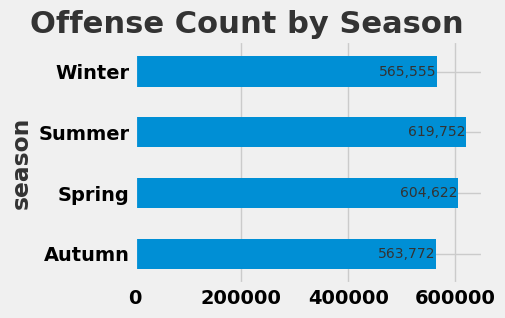

In [168]:
# Plot the sum of 'Offense Count' by 'season'
fig, ax = plt.subplots(figsize=(4, 3))
plt.title("Offense Count by Season", x=-0.3, fontsize=22, weight='bold')
bar1 = count_by_season.plot(kind='barh', ax=ax)
plt.gca().legend_ = None

# Display 'Offense Count' by season
count_by_data = count_by_season
for i in range(len(count_by_data)):
    idx = count_by_data.index[i]
    val = count_by_data.loc[idx, 'Offense Count']
    plt.text(s=f"{val:,}", y=i, x=val, ha='right', va='center', fontsize=10, weight='normal');

#### **Hourly Breakdown of 'Offense Count' Total**
* 1:00 AM has the maximum total 'Offense Count' of 218,288, which is outstanding from the other time ranges.

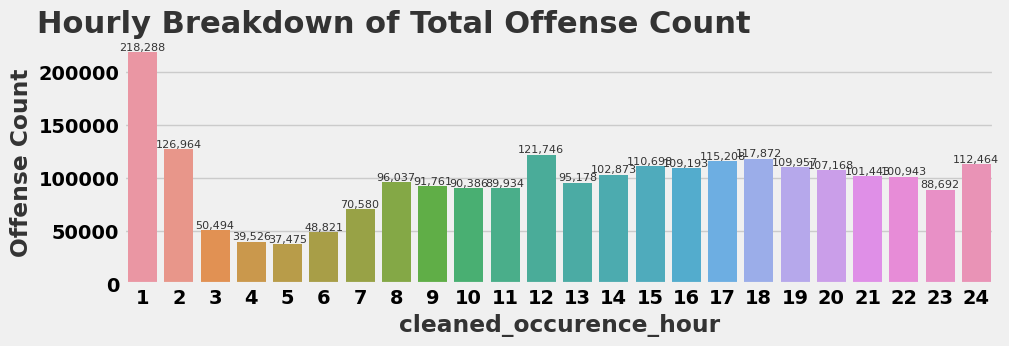

In [170]:
# Plot the sum of 'Offense Count' by 'hour'
fig, ax = plt.subplots(figsize=(10, 3))
plt.title("Hourly Breakdown of Total Offense Count", x=-0.1, fontsize=22, weight='bold')
bar1 = sns.barplot(x=count_by_hour.index, y=count_by_hour['Offense Count'], data=count_by_hour, ax=ax)

# Display the yearly 'Offense Count'
count_by_data = count_by_hour
for i in range(len(count_by_data)):
    idx = count_by_data.index[i]
    val = count_by_data.loc[idx, 'Offense Count']
    plt.text(s=f"{val:,}", x=i, y=val, ha='center', va='bottom', fontsize=8, weight='normal');

## **Feature Engineering**
* Create 'is_weekend' and 'is_holiday' columns

In [43]:
# !pip install holidays

In [171]:
# importing holidays module
import holidays

In [172]:
# Create holiday object for Texas, USA for the years 2010 through 2023
us_tx_holidays = holidays.US(years=range(2010, 2024), state='TX')

In [173]:
# Extract only federal holiday dates
fed_holidays = ["New Year's Day", "Independence Day", "Thanksgiving", "Martin Luther King Jr. Day", 
                "Washingtons Birthday", "Memorial Day", "Labor Day", "Columbus Day", "Veterans Day", 
                "Friday After Thanksgiving", "Christmas Day", "New Year's Day (Observed)", "Independence Day (Observed)", 
                "Thanksgiving (Observed)", "Martin Luther King Jr. Day (Observed)", "Washingtons Birthday (Observed)", 
                "Memorial Day (Observed)", "Labor Day (Observed)", "Columbus Day (Observed)", "Veterans Day (Observed)", 
                "Friday After Thanksgiving (Observed)", "Christmas Day (Observed)"]

holidays_dates = [k for k, v in us_tx_holidays.items() if v in fed_holidays]

In [174]:
# Check if Occurence Date falls into holidays
result = [1 if day.date() in holidays_dates else 0 for day in df_crime_final.index]

# Create a new variable 'is_holiday'
df_crime_final['is_holiday'] = result

In [175]:
# Create a variable 'is_weekend'
is_weekend = [1 if day.isoweekday() > 5 else 0 for day in df_crime_final.index]
df_crime_final['is_weekend'] = is_weekend

In [176]:
# Check 10 rows randomly
df_crime_final[(df_crime_final['is_holiday'] == 1) & (df_crime_final['is_weekend'] == 1)].sample(10)

,Occurrence Hour,Offense Count,cleaned_occurence_hour,week,month,year,mon_year,season,is_holiday,is_weekend
Occurrence Date,,,,,,,,,,
2011-01-01,3.0,1,3,Saturday,1,2011,Jan-2011,Winter,1,1
2022-12-25,19.0,1,19,Sunday,12,2022,Dec-2022,Winter,1,1
2011-01-01,3.0,1,3,Saturday,1,2011,Jan-2011,Winter,1,1
2010-12-25,1.0,1,1,Saturday,12,2010,Dec-2010,Winter,1,1
2017-01-01,12.0,1,12,Sunday,1,2017,Jan-2017,Winter,1,1
2018-11-11,1,1,1,Sunday,11,2018,Nov-2018,Autumn,1,1
2021-07-04,18.0,1,18,Sunday,7,2021,Jul-2021,Summer,1,1
2011-01-01,4.0,1,4,Saturday,1,2011,Jan-2011,Winter,1,1
2021-07-04,18.0,2,18,Sunday,7,2021,Jul-2021,Summer,1,1


In [177]:
# Check the ratio of offense count by weekend/weekday
weekend_crime = df_crime_final[df_crime_final['is_weekend'] == 1]
weekday_crime = df_crime_final[df_crime_final['is_weekend'] == 0]

weekend_ratio = sum(weekend_crime['Offense Count']) / sum(df_crime_final['Offense Count'])*100  
weekday_ratio = sum(weekday_crime['Offense Count']) / sum(df_crime_final['Offense Count'])*100  

print(f"weekend_ratio: {weekend_ratio:.2f}%, weekday_ratio: {weekday_ratio:.2f}%")

weekend_ratio: 27.88%, weekday_ratio: 72.12%


In [178]:
# mon_year_label = df_crime_final['mon_year'].unique()

# Create a list for 'Offense Count' by 'mon_year' order
count_by_mon_year_weekend_crime = weekend_crime.groupby('mon_year')['Offense Count'].sum()
mon_year_count_weekend_crime = [count_by_mon_year_weekend_crime[m_y] for m_y in mon_year_label]

In [179]:
# Create a list for 'Offense Count' by 'mon_year' order
count_by_mon_year_weekday_crime = weekday_crime.groupby('mon_year')['Offense Count'].sum()
mon_year_count_weekday_crime = [count_by_mon_year_weekday_crime[m_y] for m_y in mon_year_label]

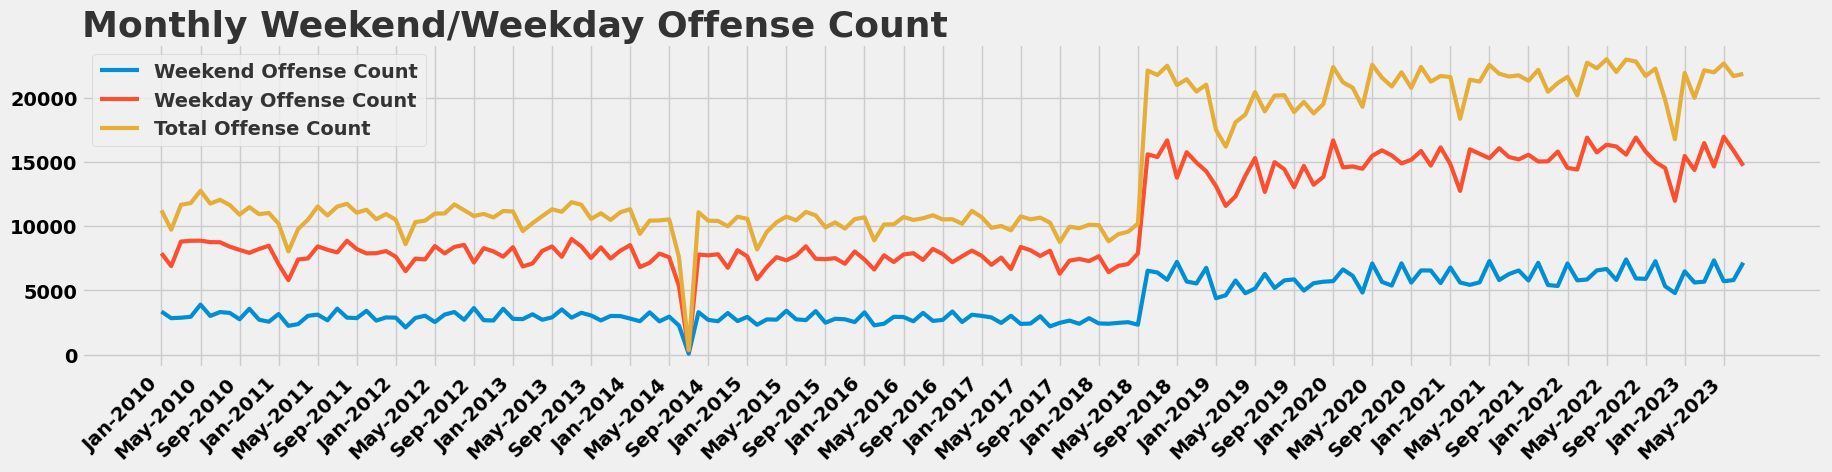

In [180]:
# Plot the sum of 'Offense Count' by 'mon_year'
fig, ax = plt.subplots(figsize=(20, 4))
plt.title("Monthly Weekend/Weekday Offense Count", fontsize=26, weight='bold')
bar1 = sns.lineplot(x=mon_year_label, y=mon_year_count_weekend_crime, ax=ax, lw=3, label='Weekend Offense Count')
bar2 = sns.lineplot(x=mon_year_label, y=mon_year_count_weekday_crime, ax=ax, lw=3, label='Weekday Offense Count')
sns.lineplot(x=mon_year_label, y=mon_year_count, ax=ax, lw=3, label='Total Offense Count')
bar1.set_xticklabels(bar1.get_xticklabels(), rotation=45, ha='right')

# Get current locations and labels
locs, labels = plt.xticks()

# Select labels to keep
keep_labels = [labels[i] for i in range(len(labels)) if i%4 == 0]

# # Set new locations and labels
plt.xticks(locs[::4], keep_labels);

In [181]:
# Check the ratio of offense count by holiday/non-holiday 
holiday_crime = df_crime_final[df_crime_final['is_holiday'] == 1]
non_holiday_crime = df_crime_final[df_crime_final['is_holiday'] == 0]

holiday_ratio = sum(holiday_crime['Offense Count']) / sum(df_crime_final['Offense Count'])*100  
non_holiday_ratio = sum(non_holiday_crime['Offense Count']) / sum(df_crime_final['Offense Count'])*100  

print(f"holiday_ratio: {holiday_ratio:.2f}%, non_holiday_ratio: {non_holiday_ratio:.2f}%")

holiday_ratio: 2.70%, non_holiday_ratio: 97.30%


# To be Updated

## **Timeseries Prediction** 
## Check Stationality
* For ARIMA time series forcasting, the time seris must be stational
* A stational time series has a mean, standard deviation, variance, and covariance that are not varying with time
* The seasonal_decompose function decomposes the timeseries by removing the trend, seasonality and residual. 
* The trend plot shows a slight value  increase as time lapses
* The seasonal plot shows a clear seasonality

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima.utils import ndiffs
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [44]:
df_index_date = df_index_date[['daily_total']]
df_index_date.head()

Page,daily_total
2015-07-01,148672476.0
2015-07-02,149593840.0
2015-07-03,141164198.0
2015-07-04,145612937.0
2015-07-05,151495372.0


<Figure size 864x1080 with 0 Axes>

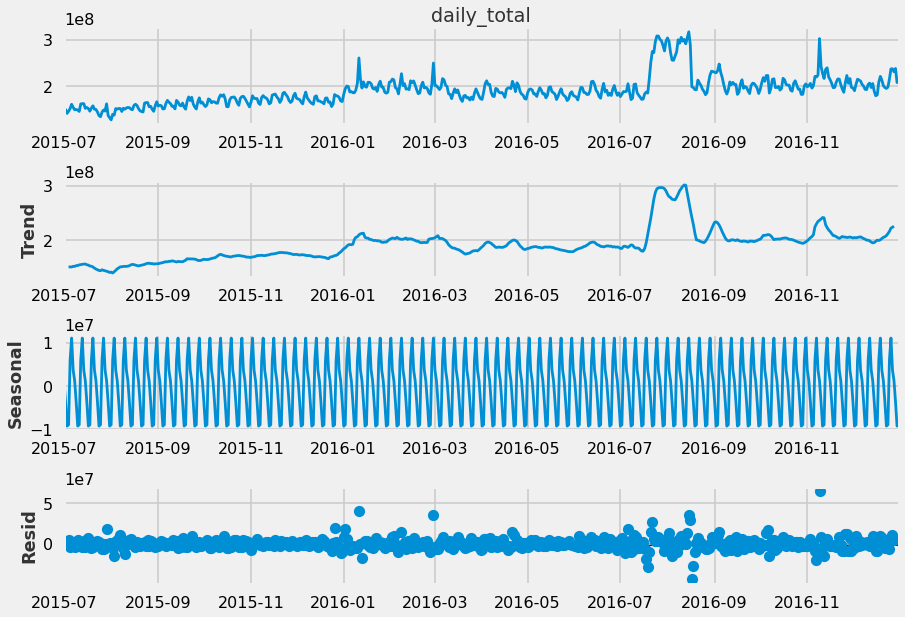

In [45]:
# Decompose the time series as an additive model into observed, trend, seasonal, and resid
fig = plt.figure(figsize=(12, 15))
dc = seasonal_decompose(df_index_date['daily_total'], model = "add")
dc.plot()
plt.ioff();

#print(dc.observed)
# print(dc.trend)
#print(dc.seasonal)
# print(dc.resid)

### **ADF (Augmented Dickey Fuller) Test**
* The result of ADF (Augmented Dickey-Fuller) test gives us the test statistics, p-value, number of lags used and 1%, 5%, 10% critical values.  
* If both test statistics < critical values AND p-value < 0.05, we can reject null hypothesis of "The data set is non-stational"
* In our ADF test, test statistics > critical values and p-value > 0.05, thus we failed to reject the null hypothis. The time series is not stational

In [46]:
# Conduct the ADF test to see whether the timeseries is stationary
# Null hypothesis: The data is non-stationary, Alternative hypothesis: The data is stationary
def adf_test(timeseries):
  print(f'Results of Dickey-Fuller Test: ')
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput = pd.Series(dftest[:4], 
                       index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
  
  for key, value in dftest[4].items():
    dfoutput[f'Critical Value ({key})'] = value
    
  print(dfoutput)

In [47]:
adf_test(df_index_date['daily_total'])

Results of Dickey-Fuller Test: 
Test Statistic                  -2.436633
p-value                          0.131663
#Lags Used                      14.000000
Number of Observations Used    535.000000
Critical Value (1%)             -3.442632
Critical Value (5%)             -2.866957
Critical Value (10%)            -2.569655
dtype: float64


### **ACF and  PACF Plots**
* ACF tails off while PACF cuts off after the 1st lag, which indicates the timeseries is correlated to itself

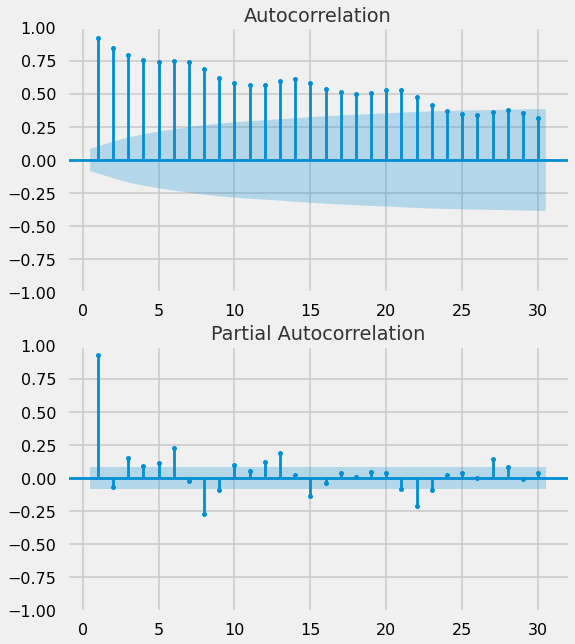

In [48]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8, 10))
plot_acf(df_index_date['daily_total'], zero=False, lags=30, ax=ax1)
plot_pacf(df_index_date['daily_total'], zero=False, lags=30, ax=ax2);

* The lagged data looks like a white noise
* The p-value of ADF test for the lagged data is smaller than 0.05, thus the null hypothesis can be rejected
* The timeseries is stationary after differenced

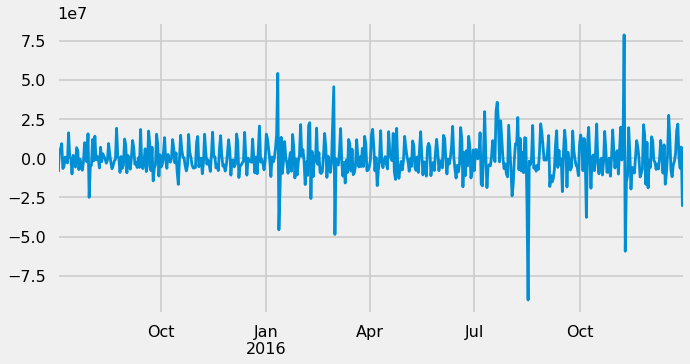

In [49]:
fig = plt.figure(figsize=(10, 5))
diff1 = df_index_date['daily_total'].diff().dropna()
diff1.plot();

* Check the ADF test against the lagged data
* Both the test statistic < critical values and p-value < 0.05. Therefore, the lagged data series is stational

In [50]:
adf_test(diff1)

Results of Dickey-Fuller Test: 
Test Statistic                -7.893705e+00
p-value                        4.367449e-12
#Lags Used                     1.300000e+01
Number of Observations Used    5.350000e+02
Critical Value (1%)           -3.442632e+00
Critical Value (5%)           -2.866957e+00
Critical Value (10%)          -2.569655e+00
dtype: float64


* Although ADF shows the laged dataset is stational, ACF and PACF shows some lags exceed a significant level

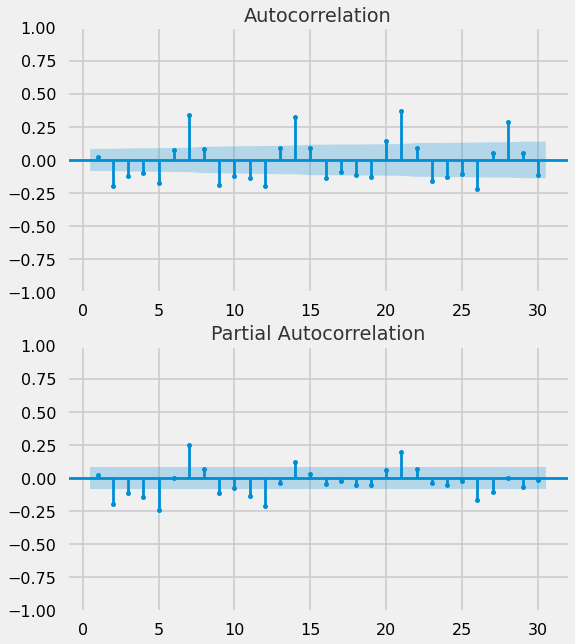

In [51]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8, 10))
plt.title("ACF & PACF with One Order Differencing")
plot_acf(diff1, zero=False, lags=30, ax=ax1)
plot_pacf(diff1, zero=False, lags=30, ax=ax2);

### **ARIMA Model**
#### **Model Selection**
* The model that has the lowest AIC value and highest lag liklihood is the best model

In [52]:
# Create a function that creates an ARIMA models and print out the statistic value, p-value and AIC
def print_ARIMA_results(data, p, d, q):
    orders = []
    aic = []
    llf = []
    for i in range(p):
        for j in range(d):
            for k in range(q):
                results = ARIMA(data, order=(i, j, k), freq='D').fit()
                orders.append((i, j, k))
                aic.append(results.aic)
                llf.append(results.llf)
    return orders, aic, llf

In [53]:
# Go through all combination of orders pf ARIMA models
orders, aic, llf = print_ARIMA_results(df_index_date['daily_total'], 3, 3, 3)

In [54]:
# show 5 best models
arima_df = pd.DataFrame({'orders': orders, 'aic': aic, 'llf': llf})
arima_df = arima_df.sort_values(['aic', 'llf']).head()
arima_df

,orders,aic,llf
23,"(2, 1, 2)",19389.207522,-9689.603761
22,"(2, 1, 1)",19448.071511,-9720.035756
14,"(1, 1, 2)",19448.748719,-9720.374359
26,"(2, 2, 2)",19453.868951,-9721.934476
5,"(0, 1, 2)",19457.094778,-9725.547389


### **Model Evaluation**
* Split the timeseries into 70% for training and 30% for testing
* Build 5 models using the best 5 orders from the previous ARIMA model summary
* Compare R2, MSE, MAPE, and RMSE for the 5 ARIMA models
* ARIMA(1, 1, 2) model has the least RMSE ofo 50039490
* The model's MAPE is 15.28%, which means that the model is greater than 85% accurate

In [55]:
# Split the dataset into 70% and 30%
def create_train_test(data, ratio=70):
    # Split timeseries into 70:30 as train and test
    train_size = int(len(data) * ratio * 0.01)
    train, test = data[:train_size], data[train_size:]
    history = [x for x in train]
    return history, test 

# Get evaluation metrics, r2, mse, mape, and rmse
def evaluate_model(history, test, orders):
    r2 = []
    mse = []
    mape = []
    rmse = []
    predictions = []
    histories = []
    for o in range(len(orders)):
        pred = []
        for t in range(len(test)):
            model = ARIMA(history, order=orders[o]).fit()
            yhat = model.forecast()[0]
            pred.append(yhat)
            histories.append(test[t])

        r2.append(r2_score(test, pred))
        mse.append(mean_squared_error(test, pred))
        mape.append(mean_absolute_percentage_error(test, pred))
        rmse.append(np.sqrt(mean_squared_error(test, pred)))
    return predictions, histories, r2, mse, mape, rmse

In [56]:
# Evaluate the 5 models, (2, 1, 2), (2, 1, 1), (1, 1, 2), (2, 2, 2), (0, 1, 2) 
data = df_index_date['daily_total']
history, test = create_train_test(data, ratio=70)

orders = arima_df['orders'].to_list()
predictions, histories, r2, mse, mape, rmse = evaluate_model(history, test, orders)


In [57]:
# Display the result
arima_evaluation_df = pd.DataFrame({'orders': orders, 'r2': r2, 'mse': mse, 'mape': mape, 'rmse': rmse})
arima_evaluation_df

,orders,r2,mse,mape,rmse
0,"(2, 1, 2)",-1.270771,2.746101e+15,0.160964,5.240325e+07
1,"(2, 1, 1)",-1.108475,2.549832e+15,0.149562,5.049586e+07
2,"(1, 1, 2)",-1.070535,2.503951e+15,0.146919,5.003949e+07
3,"(2, 2, 2)",-1.154973,2.606064e+15,0.152770,5.104962e+07
4,"(0, 1, 2)",-1.096118,2.534888e+15,0.148706,5.034767e+07


* The diagnostic plot shows no pattern in residual 
* The KDE plot shows a normal distribution
* The QQ plot shows the most of the data points are on the straight line
* The correlogram shows some lags exceed 95% of correlations

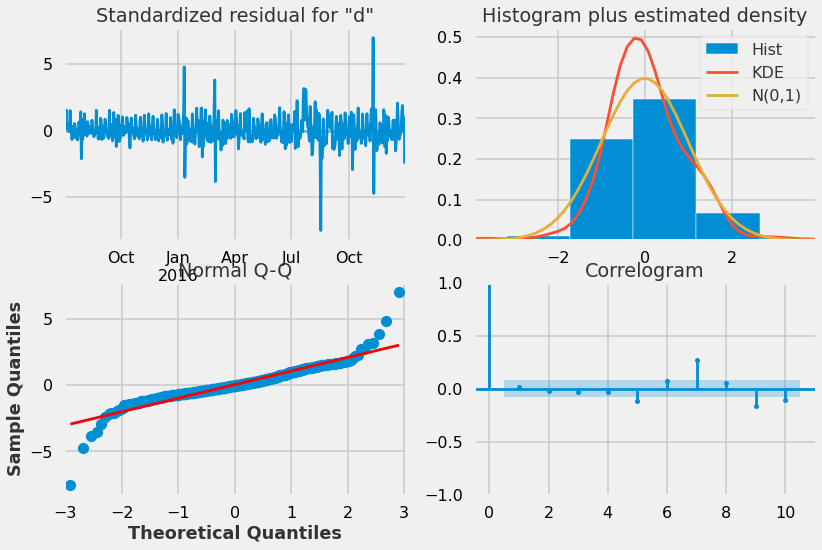

In [58]:
# Create the 4 diagnositcs plots
fig = plt.figure(figsize=(12,8))

arima_model = ARIMA(df_index_date['daily_total'], order=(1, 1, 2)).fit()
arima_model.plot_diagnostics(fig=fig)
plt.show() # Use plt.show() here explicitly to avoid creating a duplicate plot

* The model's MAPE is 0.01469 that means the model is more than 85% accurate in predictions

In [59]:
# The best model performance
print(f"----- The Best ARIMA Model -----") 
print(f"Order: {arima_evaluation_df.iloc[2, 0]}") 
print(f"Mean Squared Error: {arima_evaluation_df.iloc[2, 2]:.4f}") 
print(f"Root Mean Squared Error: {arima_evaluation_df.iloc[2, 4]:.4f}") 
print(f"Mean Absolute Percentage Error: {arima_evaluation_df.iloc[2, 3]:.2%}") 
print(f"R2 Score: {arima_evaluation_df.iloc[2, 1]:.4f}") 

----- The Best ARIMA Model -----
Order: (1, 1, 2)
Mean Squared Error: 2503950557839316.0000
Root Mean Squared Error: 50039489.9838
Mean Absolute Percentage Error: 14.69%
R2 Score: -1.0705


### **Model Visualization**
* The model prediction and the actual are very close
* The future forecast looks constant

In [60]:
# Split the dataset into training and testing
data = df_index_date['daily_total']
history, test = create_train_test(data, ratio=70)

In [61]:
# Create ARIMA(1, 1, 2) model and predict
arima_model = ARIMA(data, order=(1, 1, 2))
result_arima = arima_model.fit()

predictions = result_arima.predict()

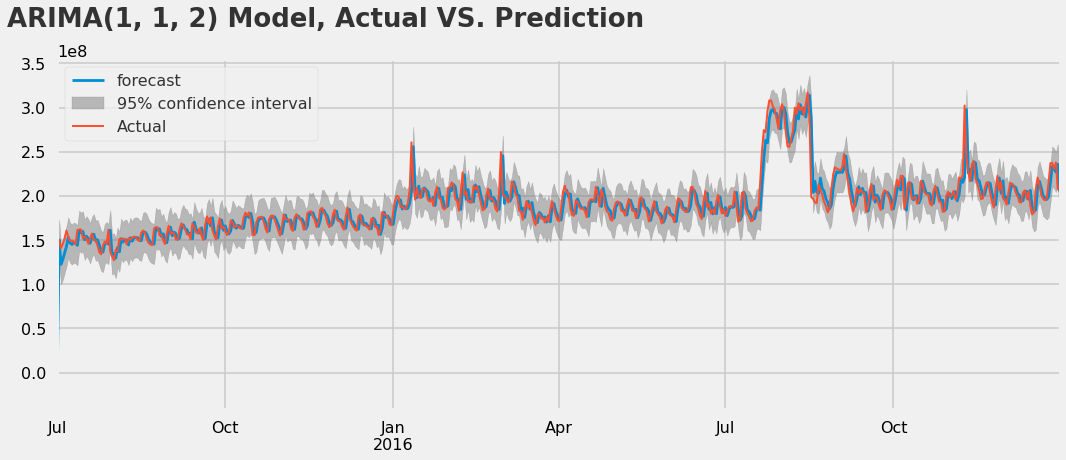

In [62]:
fig, ax = plt.subplots(figsize=(16, 6))

plt.text(-0.05, 1.15, "ARIMA(1, 1, 2) Model, Actual VS. Prediction", ha='left', va='top', transform=ax.transAxes, fontsize=26, fontweight='bold')
plot_predict(result_arima, dynamic=False, ax=ax)
sns.lineplot(data.index, data.values, ax=ax, label='Actual', lw=2)

plt.ioff();

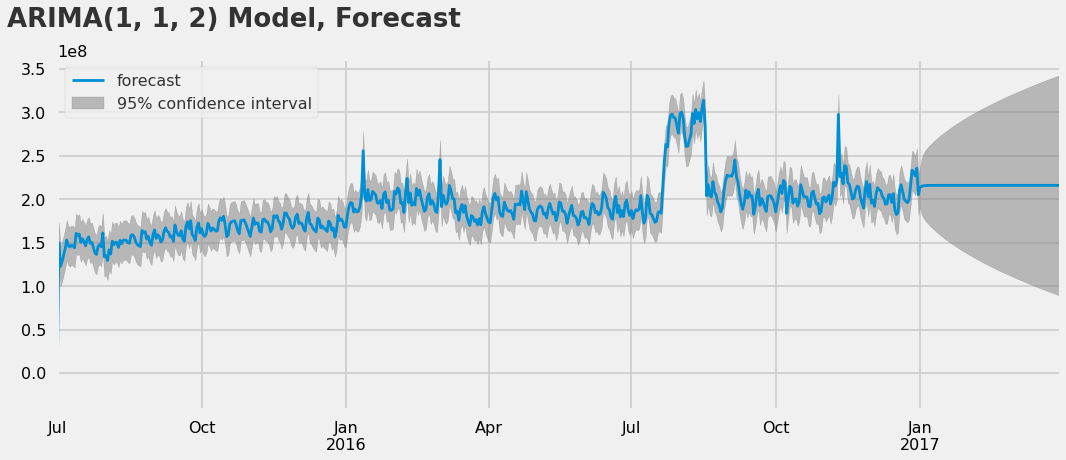

In [63]:
fig, ax = plt.subplots(figsize=(16, 6))

plt.text(-0.05, 1.15, "ARIMA(1, 1, 2) Model, Forecast", ha='left', va='top', transform=ax.transAxes, fontsize=26, fontweight='bold')
plot_predict(result_arima, dynamic=False, ax=ax, end='2017-03-31');

### **SARIMA Model**
#### **Model Selection**
* Since the data is daily and has only 550 observations, use 7 as a seasnal argument 
* auto_arima suggested (3, 1, 2)(2, 0, 2)7

In [64]:
# Create an auto SARIMA model
auto_arima_model = auto_arima(df_index_date['daily_total'], seasonal=True, m=7)
auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  550
Model:             SARIMAX(3, 1, 2)x(2, 0, 2, 7)   Log Likelihood               -9652.275
Date:                           Mon, 29 May 2023   AIC                          19326.550
Time:                                   07:39:05   BIC                          19373.939
Sample:                               07-01-2015   HQIC                         19345.071
                                    - 12-31-2016                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.321e+05   7.05e-09   3.29e+13      0.000    2.32e+05    2.32e+05
ar.L1         -1.8064      0.037    -48.483      0.000      -1.879      -1.733
ar.L2         -1.1121      0.047    -23.864      0.000      -1.203      -1.021
ar.L3         -0.1043      0.029     -3.578      0.000      -0.161      -0.047
ma.L1          1.7525      0.026     68.160      0.000       1.702       1.803
ma.L2          0.9774      0.023     41.705      0.000       0.931       1.023
ar.S.L7        0.1035      0.108      0.961      0.337      -0.108       0.315
ar.S.L14       0.8590      0.102      8.387      0.000       0.658       1.060
ma.S.L7        0.0094      0.103      0.091      0.927      -0.192       0.211
ma.S.L14      -0.8501      0.083    -10.289      0.000      -1.012      -0.688
sigma2      1.323e+14   2.16e-15   6.12e+28      0.000    1.32e+14    1.32e+14
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7726.90
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               4.07   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.41e+44. Standard errors may be unstable.
"""

#### **Model Evaluation**
* Compare R2, MSE, MAPE, and RMSE for the 5 ARIMA models
* SARIMA(3, 1, 2)x(2, 0, 2, 7) model has the least RMSE ofo 50039490
* The model's MAPE is 12.15%, which means that the model is about 88% accurate

In [65]:
# Create SARIMA(3, 1, 2)(2, 0, 2, 7) model and predict
sarima_model = SARIMAX(data, order=(3, 1, 2), seasonal_order=(2, 0, 2, 7))
result_sarima = sarima_model.fit()
predictions = result_sarima.predict()

In [66]:
result_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                       daily_total   No. Observations:                  550
Model:             SARIMAX(3, 1, 2)x(2, 0, 2, 7)   Log Likelihood               -9649.436
Date:                           Mon, 29 May 2023   AIC                          19318.871
Time:                                   07:39:07   BIC                          19361.952
Sample:                               07-01-2015   HQIC                         19335.708
                                    - 12-31-2016                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0092      4.873      0.002      0.998      -9.542       9.560
ar.L2          0.8239      4.397      0.187      0.851      -7.795       9.443
ar.L3          0.0222      0.093      0.238      0.812      -0.161       0.205
ma.L1         -0.0983      4.877     -0.020      0.984      -9.658       9.461
ma.L2         -0.8805      4.813     -0.183      0.855     -10.314       8.553
ar.S.L7        0.1122      0.128      0.878      0.380      -0.138       0.363
ar.S.L14       0.8712      0.121      7.183      0.000       0.634       1.109
ma.S.L7       -0.0229      0.119     -0.193      0.847      -0.256       0.210
ma.S.L14      -0.8831      0.090     -9.786      0.000      -1.060      -0.706
sigma2      1.323e+14   5.07e-12   2.61e+25      0.000    1.32e+14    1.32e+14
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):              7659.48
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               3.87   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.63e+41. Standard errors may be unstable.
"""

* The diagnostic plot shows no pattern in residual 
* The KDE plot shows a normal distribution
* The QQ plot shows the most of the data points are on the straight line
* The correlogram shows all lags are within 95% of correlations

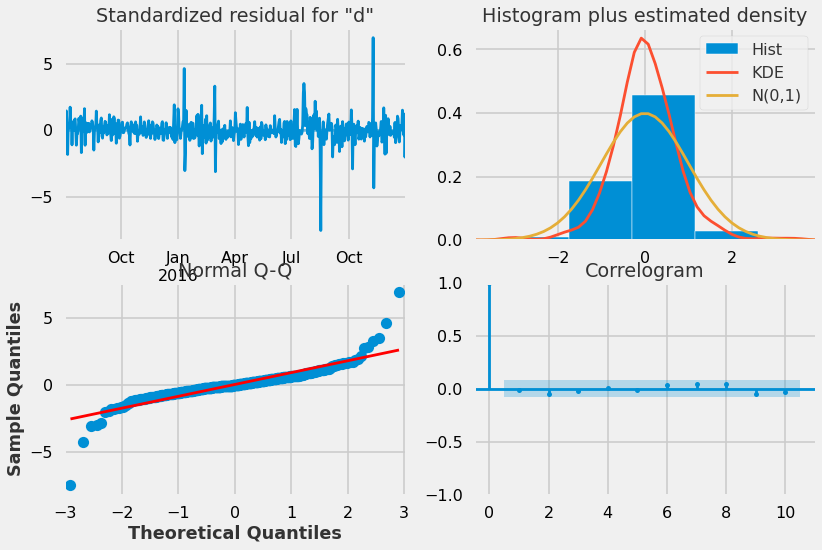

In [67]:
# Create the 4 diagnositcs plots
fig = plt.figure(figsize=(12,8))

result_sarima.plot_diagnostics(fig=fig)
plt.show() # Use plt.show() here explicitly to avoid creating a duplicate plot

In [68]:
# Split the dataset into training and testing
data = df_index_date['daily_total']
history, test = create_train_test(data, ratio=70)

In [69]:
# Get evaluation metrics, r2, mse, mape, and rmse
predictions = []
for t in range(len(test)):
    yhat = result_sarima.forecast()[0]
    predictions.append(yhat)
    histories.append(test[t])

r2 = r2_score(test, predictions)
mse = mean_squared_error(test, predictions)
mape = mean_absolute_percentage_error(test, predictions)
rmse = np.sqrt(mean_squared_error(test, predictions))

In [70]:
# The best model performance
print(f"----- The Best SARIMA Model -----") 
print(f"Mean Squared Error: {mse:.4f}") 
print(f"Root Mean Squared Error: {rmse:.4f}") 
print(f"Mean Absolute Percentage Error: {mape:.2%}") 
print(f"R2 Score: {r2:.4f}") 

----- The Best SARIMA Model -----
Mean Squared Error: 1218405635936751.5000
Root Mean Squared Error: 34905667.6764
Mean Absolute Percentage Error: 12.15%
R2 Score: -0.0075


#### **Model Visualization**
* The model prediction and the actual are very close
* The future forecast shows seasonality

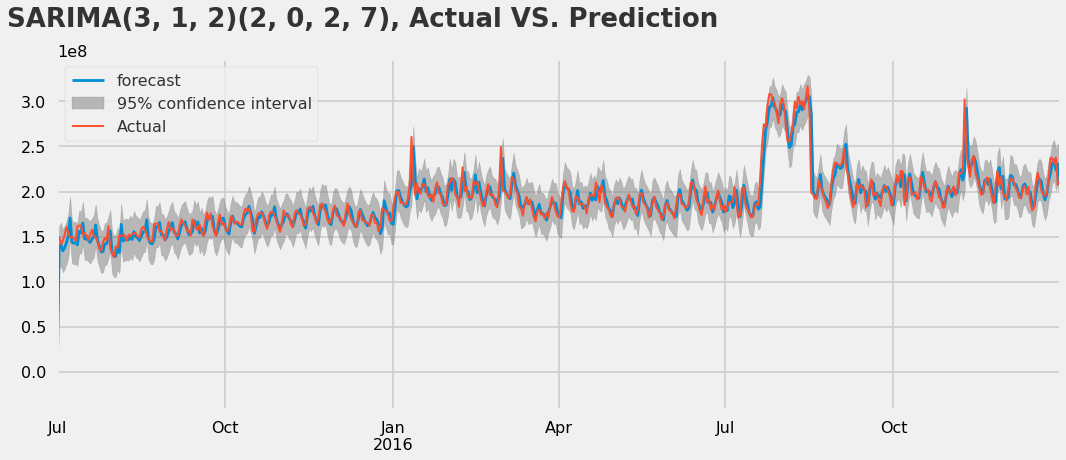

In [71]:
fig, ax = plt.subplots(figsize=(16, 6))

plt.text(-0.05, 1.15, "SARIMA(3, 1, 2)(2, 0, 2, 7), Actual VS. Prediction", ha='left', va='top', transform=ax.transAxes, fontsize=26, fontweight='bold')
plot_predict(result_sarima, dynamic=False, ax=ax)
sns.lineplot(data.index, data.values, ax=ax, label='Actual', lw=2)

plt.ioff();

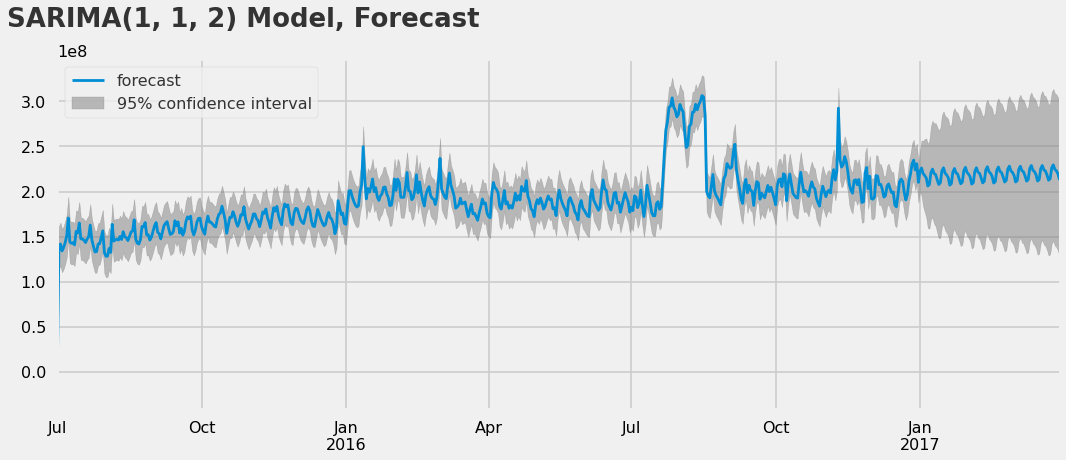

In [72]:
fig, ax = plt.subplots(figsize=(16, 6))

plt.text(-0.05, 1.15, "SARIMA(1, 1, 2) Model, Forecast", ha='left', va='top', transform=ax.transAxes, fontsize=26, fontweight='bold')
plot_predict(result_sarima, dynamic=False, ax=ax, end='2017-03-31');

### **Prohet Model**
### **Model Evaluation**
* Prophet model requires 2 columns: 'ds' and 'y'
* 'ds' is a Pandas datetime variable and 'y' is a numerical variable
* Prophet model has the least RMSE ofo 51583297.5739
* The model's MAPE is 16.64%, which means that the model is greater than 83% accurate

In [73]:
from prophet import Prophet
from prophet.plot import plot_plotly
from prophet.plot import add_changepoints_to_plot
from prophet.plot import plot_components_plotly

In [74]:
# Prepare dataset
ds = df_index_date.index
y = df_index_date['daily_total']
df = pd.DataFrame({'ds': ds, 'y': y}).reset_index().drop('index', axis=1)

In [75]:
df.head()

,ds,y
0,2015-07-01,148672476.0
1,2015-07-02,149593840.0
2,2015-07-03,141164198.0
3,2015-07-04,145612937.0
4,2015-07-05,151495372.0


In [76]:
# Split the dataset into training and testing
train_size = int(len(df) * 70 * 0.01)
train, test = df[:train_size], df[train_size:]

In [77]:
# Build aProphet model
prophet_model = Prophet()
prophet_model.fit(train)

07:39:11 - cmdstanpy - INFO - Chain [1] start processing
07:39:11 - cmdstanpy - INFO - Chain [1] done processing


In [78]:
#future= prophet_basic.make_future_dataframe(periods=prediction_size, freq='W')
forecast = prophet_model.predict(test)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-07-20,1.839473e+08,1.738098e+08,1.959057e+08,1.839473e+08,1.839473e+08,1.042014e+06,1.042014e+06,1.042014e+06,1.042014e+06,1.042014e+06,1.042014e+06,0.0,0.0,0.0,1.849893e+08
1,2016-07-21,1.838972e+08,1.693384e+08,1.914261e+08,1.838972e+08,1.838972e+08,-3.495200e+06,-3.495200e+06,-3.495200e+06,-3.495200e+06,-3.495200e+06,-3.495200e+06,0.0,0.0,0.0,1.804020e+08
2,2016-07-22,1.838472e+08,1.653476e+08,1.863596e+08,1.838472e+08,1.838472e+08,-8.139635e+06,-8.139635e+06,-8.139635e+06,-8.139635e+06,-8.139635e+06,-8.139635e+06,0.0,0.0,0.0,1.757076e+08
3,2016-07-23,1.837972e+08,1.648089e+08,1.863548e+08,1.837890e+08,1.838060e+08,-8.599789e+06,-8.599789e+06,-8.599789e+06,-8.599789e+06,-8.599789e+06,-8.599789e+06,0.0,0.0,0.0,1.751974e+08
4,2016-07-24,1.837472e+08,1.782865e+08,2.000982e+08,1.837263e+08,1.837681e+08,5.374919e+06,5.374919e+06,5.374919e+06,5.374919e+06,5.374919e+06,5.374919e+06,0.0,0.0,0.0,1.891221e+08


In [79]:
error = (test['y'].values - forecast['yhat'].values)
mse = sum(error * error) / len(test)
rmse = mse  ** 0.5
mape = abs(error / test['y'].values).mean()

In [80]:
# The best model performance
print(f"----- The Prophet Model -----") 
print(f"Mean Squared Error: {mse:.4f}") 
print(f"Root Mean Squared Error: {rmse:.4f}") 
print(f"Mean Absolute Percentage Error: {mape:.2%}") 

----- The Prophet Model -----
Mean Squared Error: 2660836588592930.0000
Root Mean Squared Error: 51583297.5739
Mean Absolute Percentage Error: 16.64%


### **Model Visualization**
* The Prophet model's forecast shows seasonality
* The forecast is away from the actual data points.

In [81]:
train.head()

,ds,y
0,2015-07-01,148672476.0
1,2015-07-02,149593840.0
2,2015-07-03,141164198.0
3,2015-07-04,145612937.0
4,2015-07-05,151495372.0


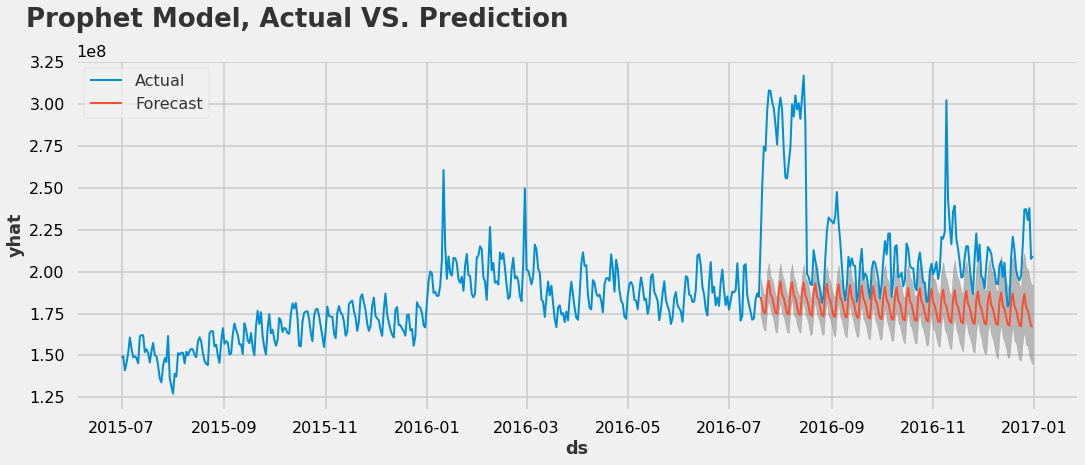

In [82]:
fig, ax = plt.subplots(figsize=(16, 6))

plt.text(-0.05, 1.15, "Prophet Model, Actual VS. Prediction", ha='left', va='top', transform=ax.transAxes, fontsize=26, fontweight='bold')

sns.lineplot(df_index_date['daily_total'].index, df_index_date['daily_total'].values, ax=ax, label='Actual', lw=2)
sns.lineplot(forecast['ds'], forecast['yhat'], ax=ax, label='Forecast', lw=2)
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='grey', alpha=0.5)
plt.ioff();

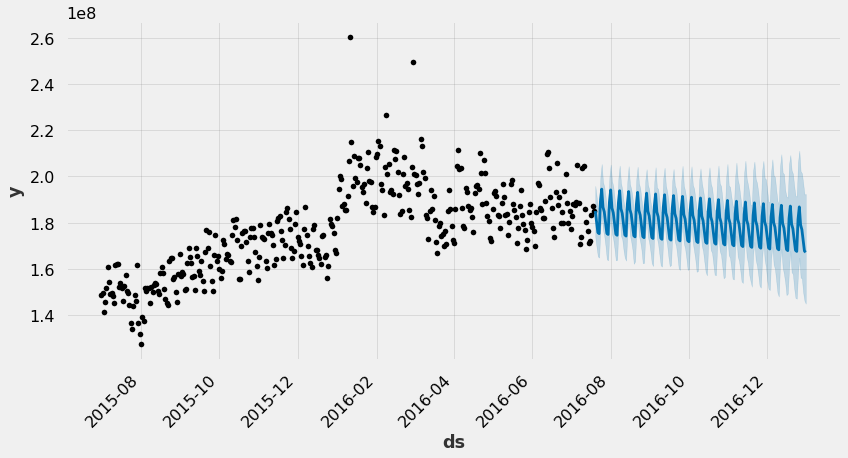

In [83]:
figure, ax = plt.subplots(figsize=(12, 6))
fig1 = prophet_model.plot(forecast, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

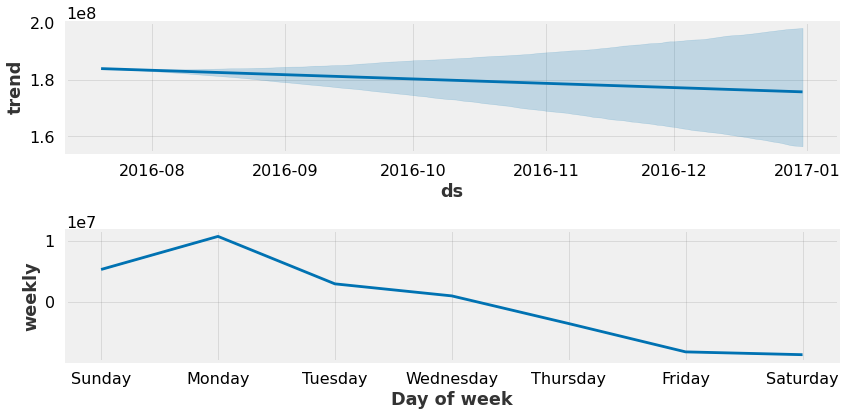

In [84]:
fig1 = prophet_model.plot_components(forecast, figsize=(12, 6))

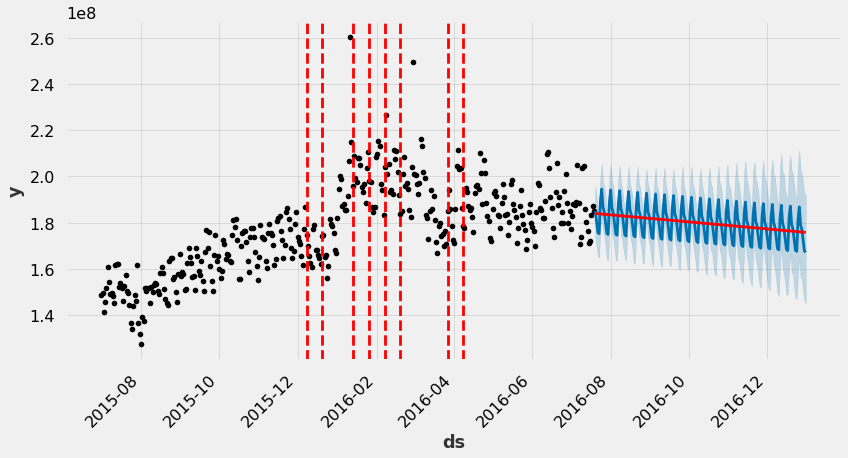

In [85]:
figure, ax = plt.subplots(figsize=(12, 6))
fig = prophet_model.plot(forecast, ax=ax)
a = add_changepoints_to_plot(fig.gca(), prophet_model, forecast)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

In [86]:
# Check the dates where the changepoints occured 
prophet_model.changepoints

12    2015-07-13
25    2015-07-26
37    2015-08-07
49    2015-08-19
61    2015-08-31
74    2015-09-13
86    2015-09-25
98    2015-10-07
111   2015-10-20
123   2015-11-01
135   2015-11-13
147   2015-11-25
160   2015-12-08
172   2015-12-20
184   2016-01-01
196   2016-01-13
209   2016-01-26
221   2016-02-07
233   2016-02-19
246   2016-03-03
258   2016-03-15
270   2016-03-27
282   2016-04-08
295   2016-04-21
307   2016-05-03
Name: ds, dtype: datetime64[ns]

### **Linear Regression Models**
### **Feature Engineering**  
* Create a new variable extracted from the "Page" column and predict access with a linear regression mode
* Sum up each page's access  
* Add new columns, 'year', 'month' and 'weekday' to the dataset  
* Subtract the previous day's access to create a lag  
* Standardize continuous variables  
* One-hot encode the categorical variables 

In [87]:
daily_total = daily_access_by_url_t.sum(axis=1)
daily_access_by_url_t['daily_total'] = daily_total

In [88]:
# Extract year, montha and weekday
year = [t.strftime("%Y") for t in daily_access_by_url_t.index]
month = [t.strftime("%m") for t in daily_access_by_url_t.index]
weekday = [t.strftime("%A") for t in daily_access_by_url_t.index]
daily_access_by_url_t['year'] = year
daily_access_by_url_t['month'] = month
daily_access_by_url_t['weekday'] = weekday

In [89]:
# For the URL columns, get the difference by taking the previous day's access
df_ohe1 = daily_access_by_url_t.iloc[:, :-4].diff()
# # Standardize 
for col in df_ohe1:
    df_ohe1[col] = (df_ohe1[col] - df_ohe1[col].mean()) / df_ohe1[col].std()

# One-hot encoding 'year', 'month', and 'weekday'
df_ohe2 = pd.get_dummies(daily_access_by_url_t.iloc[:, -3:])

# Standardize 'daily_total'
df_ohe3 = (daily_access_by_url_t['daily_total'] - daily_access_by_url_t['daily_total'].mean()) / daily_access_by_url_t['daily_total'].std()

# Concatenate df_ohe1 and df_ohe2
df_ohe = pd.concat([df_ohe1, df_ohe2, df_ohe3], axis="columns")
df_ohe = df_ohe[1:]
df_ohe.head()

,commons.wikimedia.org,de.wikipedia.org,en.wikipedia.org,es.wikipedia.org,fr.wikipedia.org,ja.wikipedia.org,ru.wikipedia.org,www.mediawiki.org,zh.wikipedia.org,year_2015,year_2016,month_01,month_02,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,daily_total
2015-07-02,0.090205,-0.128644,-0.041332,-0.311070,0.046324,0.963871,0.086319,0.192610,0.004278,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,-1.278319
2015-07-03,-0.075052,-0.366602,-0.520874,-0.541320,-0.315824,-0.743669,-0.391070,-0.329908,-0.059067,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,-1.545015
2015-07-04,-0.512177,-0.716620,0.386856,-0.377731,0.530313,1.738050,-0.295407,-0.096831,0.067355,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,-1.404266
2015-07-05,0.266968,1.286148,0.319667,0.516123,-0.156641,-0.362279,0.296161,0.168523,0.514400,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,-1.218159
2015-07-06,0.382341,0.925964,0.784596,0.892897,0.336046,-1.072201,0.375941,0.303118,0.035834,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,-0.925608


<AxesSubplot: title={'center': 'Distribution of Target Variable'}, xlabel='daily_total', ylabel='Density'>

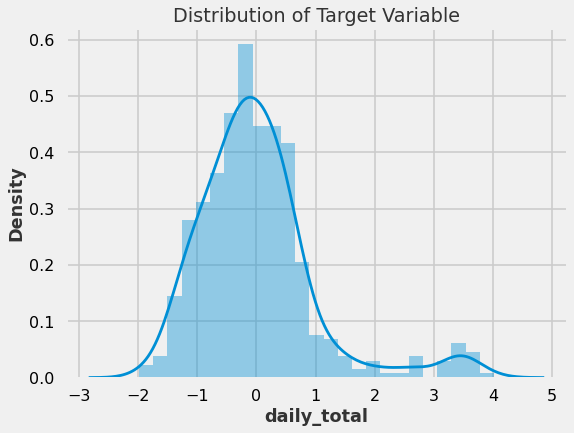

In [90]:
# Plot the distribution of 'daily_total'
plt.figure(figsize=(8, 6))
plt.title("Distribution of Target Variable")

sns.distplot(df_ohe['daily_total'])

* The target variable, 'daily_total' is highly positively correlated to 'year_2016' while highly negatively correlated to 'year_2015'
* 'de.wikipedia.org' and 'weekday_Sunday' has a positive correlation
* 'ru.wikipedia.org' and 'en.wikipedia.org' has a positive correlation

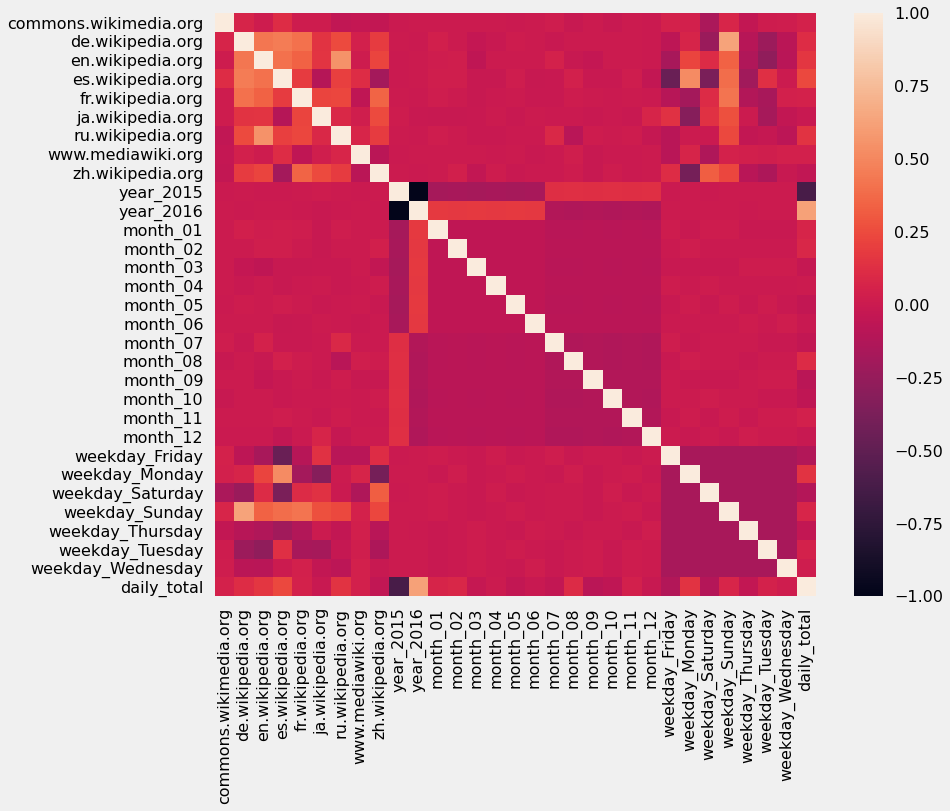

In [91]:
# Plot correlation od df_ohe
fig = plt.figure(figsize=(12, 10))
corr = df_ohe.corr()
sns.heatmap(corr);

## **Model Creation**

* Create linear regression, RandomForestRegressor, and XGBRegressor models
* Evaluate models using R2, RMSE, MSE MAPE and MAE
* The RandomForestRegressor model has the best R2 score and smallest RMSE, and MSE

In [92]:
# Create a Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn import tree

In [93]:
# Create X_train, y_train, X_test, and y_test
X = df_ohe.drop('daily_total', axis=1)
y = df_ohe['daily_total']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=327)

In [94]:
# Linear Regression model
pipe0 = Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())])
pipe0.fit(X_train, y_train)
y_pred0 = pipe0.predict(X_test)

In [95]:
# Get MSE, RMSE, MAR, MAPE and R2 score
def get_evaluation_metrics(test, pred):
    metrics = {}
    metrics['Mean Squared Error'] = mean_squared_error(test, pred)
    metrics['Root Mean Squared Error'] = mean_squared_error(test, pred) ** (1/2)
    metrics['Mean Absolute Error'] = mean_absolute_error(test, pred)
    metrics['Mean Absolute Percent Error'] = mean_absolute_error(test, pred)
    metrics['R2 Score'] = r2_score(test, pred)
    return metrics

def print_metrics(metrics):
    for k, v in metrics.items():
        print(f'{k}: {v:.4f}')

In [96]:
# RandomForestRegressor model
pipe1 = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestRegressor())])
pipe1.fit(X_train, y_train)
y_pred1 = pipe1.predict(X_test)

In [97]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
len(rf.estimators_)

100

In [98]:
rf.estimators_[0].tree_.max_depth

24

In [99]:
rf = RandomForestRegressor(n_estimators=100, max_depth=3)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=3)

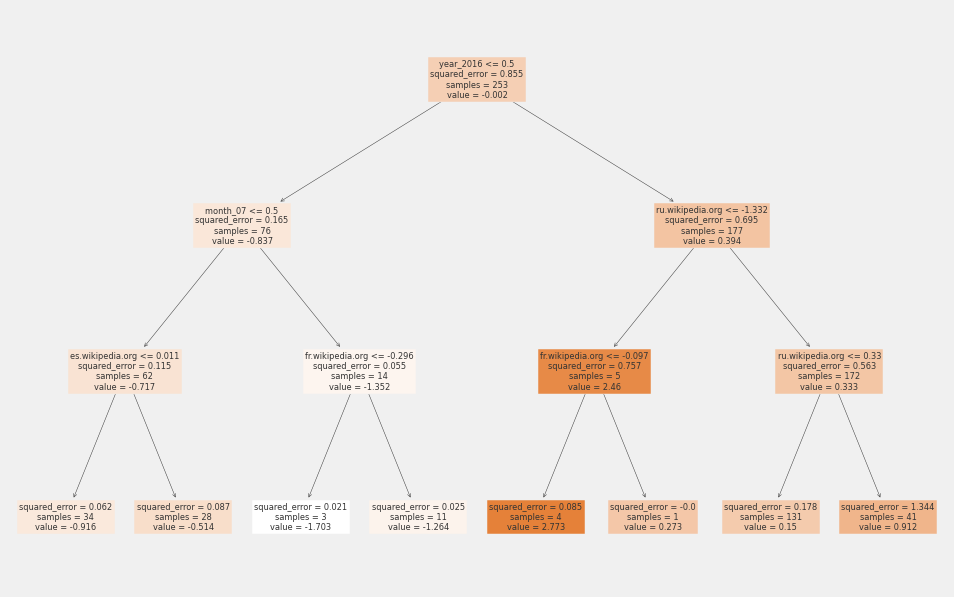

In [100]:
fig = plt.figure(figsize=(15, 10))
_ = tree.plot_tree(rf.estimators_[0], feature_names=X_train.columns, filled=True)

In [101]:
# XGBRegressor model
pipe2 = Pipeline([('scaler', StandardScaler()), ('xgb', XGBRegressor())])
pipe2.fit(X_train, y_train)
y_pred2 = pipe2.predict(X_test)

In [102]:
# Print the top 5 features
pd.DataFrame(pipe2['xgb'].feature_importances_, index=X_train.columns, 
             columns=['Feature Importances']).sort_values(by='Feature Importances', ascending=False).head()

,Feature Importances
year_2015,0.517159
month_08,0.177741
ru.wikipedia.org,0.045329
month_01,0.037526
month_07,0.030202


## **Model Evaluation**
* The XGBRegressor model has the least RMSE of 0.601300 among the linear models
* The XGBRegressor's MAPE is 0.343677, which means the model is 65% accurate

In [103]:
print("----- Linear Regression Model -----")
metrics0 = get_evaluation_metrics(y_test, y_pred0)
print_metrics(metrics0)

----- Linear Regression Model -----
Mean Squared Error: 0.4108
Root Mean Squared Error: 0.6409
Mean Absolute Error: 0.4154
Mean Absolute Percent Error: 0.4154
R2 Score: 0.5986


In [104]:
print("----- RandomForestRegressor Model -----")
metrics1 = get_evaluation_metrics(y_test, y_pred1)
print_metrics(metrics1)

----- RandomForestRegressor Model -----
Mean Squared Error: 0.3611
Root Mean Squared Error: 0.6009
Mean Absolute Error: 0.3608
Mean Absolute Percent Error: 0.3608
R2 Score: 0.6472


In [105]:
print("----- XGBRegressor Model -----")
metrics2 = get_evaluation_metrics(y_test, y_pred2)
print_metrics(metrics2)

----- XGBRegressor Model -----
Mean Squared Error: 0.3616
Root Mean Squared Error: 0.6013
Mean Absolute Error: 0.3437
Mean Absolute Percent Error: 0.3437
R2 Score: 0.6467


In [106]:
linear_models = ['Linear Regression', 'RandomForestRegressor', 'XGBRegressor']
metrics = [metrics0, metrics1, metrics2]
metrics_df = pd.DataFrame(metrics, index=linear_models)
metrics_df

,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percent Error,R2 Score
Linear Regression,0.410764,0.640909,0.415381,0.415381,0.598599
RandomForestRegressor,0.361066,0.600887,0.360798,0.360798,0.647165
XGBRegressor,0.361562,0.601300,0.343677,0.343677,0.646680


## **Model Visualization**
* Linear regression models prediction plot shows the models capture the trend 
* The XGBRegressor model captures the spikes occured in July through August in 2016.

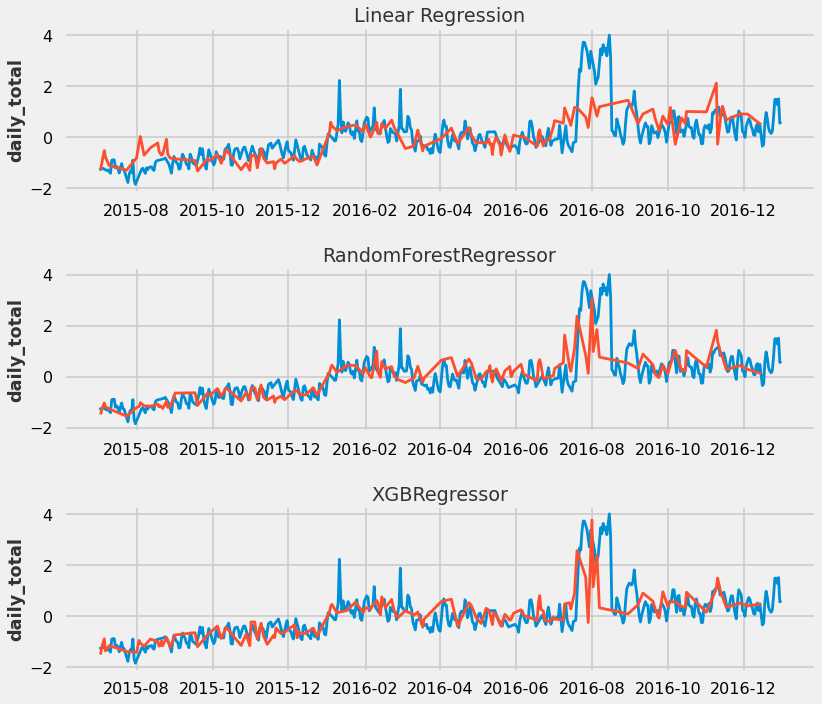

In [107]:
predictions = [y_pred0, y_pred1, y_pred2]
fig = plt.figure(figsize=(12, 10))
fig.tight_layout(pad=10.0)

for i in range(len(linear_models)):
    fig.tight_layout(pad=2.0)
    ax = plt.subplot(3, 1, i+1, sharex=ax )
    plt.title(linear_models[i])
    sns.lineplot(X_train.index, y_train)
    sns.lineplot(X_test.index, predictions[i])

### **Conclusion**
* The evaluation metrics of the ARIMA, SARIMA, and Prophet models are better than the linear regression models.
* Especially, the SARIMA model has the highest MAPE of 12.15%, which means the model predicts 87.85% accurate.